In [20]:
import pandas as pd

df = pd.read_csv("alturas2.csv")

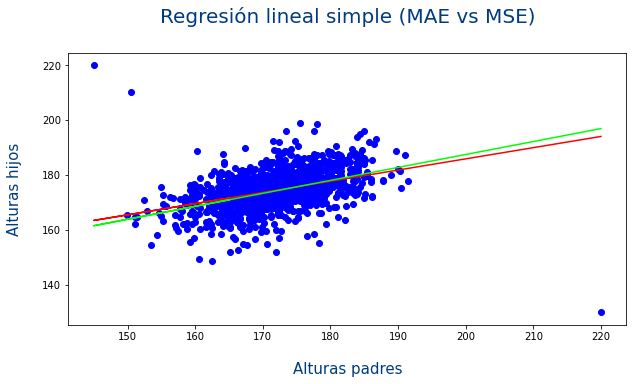

In [21]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LinearRegression as LR
import statsmodels.formula.api as smf

X = np.array(df.Father).reshape((-1, 1))
Y = np.array(df.Son)

modelo_MSE = LR()
modelo_MSE.fit(X, Y)

modelo_MAE = smf.quantreg('Son ~ Father', df)
res = modelo_MAE.fit(q=.5)

ols = dict(a = res.params['Intercept'],
           b = res.params['Father'])
get_y = lambda a, b: a + b * X
Y2 = get_y(ols['a'], ols['b'])

figure = plt.figure(figsize=(10, 5))
axis = figure.add_subplot()

# Las etiquetas
axis.set_xlabel('Alturas padres', fontsize=15,labelpad=20,color="#003B80")  
axis.set_ylabel('Alturas hijos', fontsize=15,labelpad=20,color="#003B80")
axis.set_title("Regresión lineal simple (MAE vs MSE)", fontsize=20,pad=30,color="#003B80")

Y1 = df.Father.apply(lambda x: modelo_MSE.predict(np.array(x).reshape(-1, 1)))


# Los datos que se muestran
axis.plot(df.Father, df.Son,"o",color = "#0000FF", zorder = 1)
axis.plot(df.Father, Y1, color = "#FF0000", zorder = 2)
axis.plot(X, Y2, color = "#00FF00", zorder = 3)
